In [1]:
import sys
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# MNISTデータのロード
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)

(60000, 28, 28)


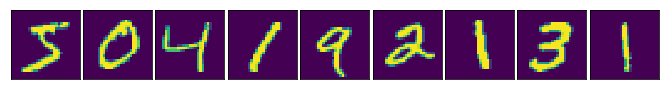

In [4]:
#この学習用データの画像を確認してみます
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ay = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ay.imshow(x_train[i])

In [5]:
path = "/root/userspace/contents/materials_homework/"
import gzip

#学習用とテスト用のデータを定義。
dl_list = [
    'emnist-balanced-train-images-idx3-ubyte.gz',
    'emnist-balanced-train-labels-idx1-ubyte.gz',
    'emnist-balanced-test-images-idx3-ubyte.gz',
    'emnist-balanced-test-labels-idx1-ubyte.gz'
]

dataset_dir = "/root/userspace/contents/materials_homework/emnist/"

In [6]:
#学習用訓練データを読み出し
file_path = dataset_dir + '/' + dl_list[0]#train-images
train_data = gzip.open(file_path, 'rb')#gzファイルを開く
train_data = train_data.read()#開いたデータを読みます
train_data = np.frombuffer(train_data, np.uint8)
print(len(train_data))

88435216


In [7]:
#長さが変なので加工する
train_data = np.frombuffer(train_data, np.uint8, offset=16)
print(len(train_data))

#リシェープする
train_img = train_data.reshape(-1, 28, 28)
train_img = train_img.swapaxes(1, 2)#このデータセットはX軸とY軸が入れ替わってるから変換する
print(train_img.shape)

88435200
(112800, 28, 28)


In [8]:
#e-mnist + mnist
print(type(train_img))
print(type(x_train))
train_img2 = np.append(np.array(train_img), np.array(x_train))
train_img2 = np.append(np.array(train_img2), np.array(x_train))
print(train_img2.shape)
#リシェープする
train_img2 = train_img2.reshape(-1, 28, 28)
print(train_img2.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(182515200,)
(232800, 28, 28)


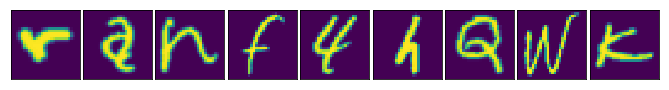

In [9]:
#この学習用データの画像を確認してみます
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_img2[i])

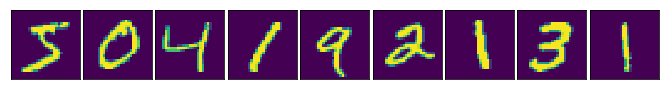

In [10]:
#この学習用データの画像を確認してみます2
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_img2[i+112800])

In [11]:
#学習用データを完成させる
train_img2 =  train_img2.reshape((train_img2.shape[0], 28, 28, 1)) / 255
print(train_img2.shape)

(232800, 28, 28, 1)


In [12]:
#ちな、値は０～１までの実数。これを0か1の整数にしたい。
train_img2[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [13]:
 print(np.ceil(train_img2[0]))# 切り上げし、0か1のデータにする。

[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [

In [14]:
#学習用データを0/1のデータに加工する
train_img2 = np.ceil(train_img2)

In [15]:
#学習用正解データを読み出す
file_path = dataset_dir + '/' + dl_list[1]#train_labelデータ
train_data = gzip.open(file_path, 'rb')
train_data = train_data.read()
train_data = np.frombuffer(train_data, np.uint8, offset = 8)
print(len(train_data))

112800


In [16]:
#e-mnist + mnist
print(type(train_data))
print(type(y_train))
train_label2 = np.append(np.array(train_data), np.array(y_train))
train_label2 = np.append(np.array(train_label2), np.array(y_train))
print(train_label2.shape)
#リシェープする
#train_label2 = train_abe2.reshape(-1, 28, 28)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(232800,)


In [17]:
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical#one-hotベクトルにするライブラリをロード

#one-hotベクトルにして学習用正解データを完成させる
train_label2 = to_categorical(train_label2)
print(train_label2.shape)

(232800, 47)


In [18]:
#テスト用データを読み出し
file_path = dataset_dir + '/' + dl_list[2]#test-images
train_data = gzip.open(file_path, 'rb')#gzファイルを開く
train_data = train_data.read()#開いたデータを読みます
train_data = np.frombuffer(train_data, np.uint8)
print(len(train_data))

14739216


In [19]:
#長さが変なので加工する
train_data = np.frombuffer(train_data, np.uint8, offset=16)
print(len(train_data))

test_img = train_data.reshape(-1, 28, 28)
test_img = test_img.swapaxes(1, 2)#このデータセットはX軸とY軸が入れ替わってるから変換する
print(test_img.shape)

14739200
(18800, 28, 28)


In [20]:
#e-mnist + mnist
print(type(test_img))
print(type(x_test))
test_img2 = np.append(np.array(test_img), np.array(x_test))
print(test_img2.shape)
#リシェープする
test_img2 = test_img2.reshape(-1, 28, 28)
print(test_img2.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(22579200,)
(28800, 28, 28)


In [21]:
#テスト用データを完成させる
test_img2 =  test_img2.reshape((test_img2.shape[0], 28, 28, 1)) / 255
print(test_img2.shape)

(28800, 28, 28, 1)


In [22]:
#テスト用データを0/1のデータに加工する
test_img2 = np.ceil(test_img2)

In [23]:
#テスト用正解データを読み出す
file_path = dataset_dir + '/' + dl_list[3]#test_labelデータ
train_data = gzip.open(file_path, 'rb')
train_data = train_data.read()
train_data = np.frombuffer(train_data, np.uint8, offset = 8)
print(len(train_data))

18800


In [24]:
#e-mnist + mnist
print(type(train_data))
print(type(y_test))
test_label2 = np.append(np.array(train_data), np.array(y_test))
print(test_label2.shape)
#リシェープする
#train_label2 = train_abe2.reshape(-1, 28, 28)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(28800,)


In [25]:
#one-hotベクトルにして学習用正解データを完成させる
test_label2 = to_categorical(test_label2)
print(test_label2.shape)

(28800, 47)


In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42
print("TensorFlow version: " + tf.__version__)

TensorFlow version: 1.13.1


In [27]:
model = Sequential()

# 入力画像 28x28x1 (縦の画素数)x(横の画素数)x(チャンネル数)
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',#karnel_sizeがフィルタのサイズとなる
                 kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 26x26x32 -> 13x13x32

model.add(Conv2D(256, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 13x13x32 -> 11x11x64
model.add(MaxPooling2D(pool_size=(2, 2)))  # 11x11x64 -> 6x6x64

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(47, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


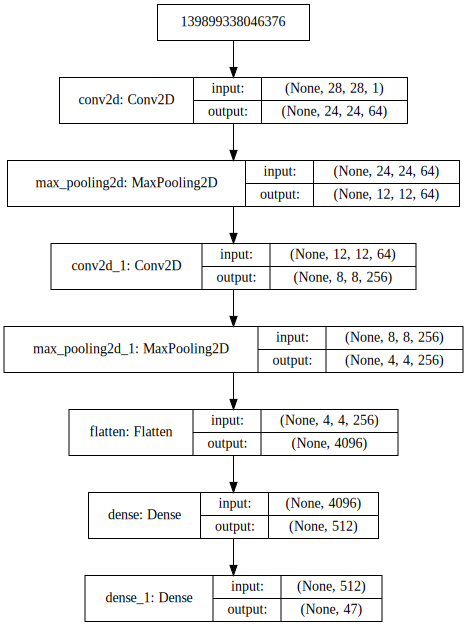

In [28]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [29]:
#学習用データで訓練開始
early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1)#早期終了を定義
histroy = model.fit(x=train_img2, y=train_label2, batch_size=128, epochs=20, verbose=1,
          validation_split=0.1, callbacks=[early_stopping])#スタート

Train on 209520 samples, validate on 23280 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
209520/209520 [==============================] - 64s 303us/sample - loss: 0.4516 - acc: 0.8631 - val_loss: 0.0472 - val_acc: 0.9864
Epoch 2/20
209520/209520 [==============================] - 25s 120us/sample - loss: 0.2415 - acc: 0.9159 - val_loss: 0.0331 - val_acc: 0.9900
Epoch 3/20
209520/209520 [==============================] - 25s 120us/sample - loss: 0.1996 - acc: 0.9273 - val_loss: 0.0200 - val_acc: 0.9943
Epoch 4/20
209520/209520 [==============================] - 25s 120us/sample - loss: 0.1700 - acc: 0.9366 - val_loss: 0.0210 - val_acc: 0.9940
Epoch 5/20
209520/209520 [==============================] - 25s 120us/sample - loss: 0.1475 - acc: 0.9429 - val_loss: 0.0094 - val_acc: 0.9971
Epoch 6/20
209520/209520 [==============================] - 25s 120us/sample - loss: 0.1279 - acc: 0.9502 - val_loss: 0.0095 - val_acc: 0.9977
Epoch 7/20
209520/209520 [=================

Text(0, 0.5, 'Accuracy & Loss')

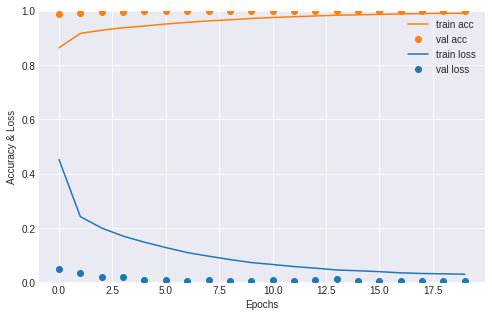

In [30]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(8,5))

epoch = histroy.epoch
train_acc = histroy.history["acc"]
train_loss = histroy.history["loss"]
val_acc = histroy.history["val_acc"]
val_loss = histroy.history["val_loss"]

plt.plot(epoch, train_acc, label="train acc", c="#ff7f0e")
plt.plot(epoch, val_acc, marker="o", lw=0, label="val acc", c="#ff7f0e")

plt.plot(epoch, train_loss, label="train loss", c="#1f77b4")
plt.plot(epoch, val_loss, marker="o", lw=0, label="val loss", c="#1f77b4")

plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.xlabel("Epochs")
plt.ylabel("Accuracy & Loss")

In [31]:
#出来上がったモデルの汎化性能をチェックする
test_pred = model.predict(test_img2)
print(test_pred.shape)

(28800, 47)


In [32]:
# 性能評価
score = model.evaluate(test_img2, test_label2, verbose=0)
print('Test loss:', score[0])
print('テストデータでの正解率:', score[1])

Test loss: 0.6696946944358663
テストデータでの正解率: 0.89065975


In [33]:
model.save(path + 'emnist_cnn.h5')#モデルをセーブ